In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, SimpleRNN, LSTM
from keras.layers.embeddings import Embedding
from tensorflow.keras.optimizers import SGD

In [3]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras import Input
from tensorflow .keras.optimizers import Adam

In [4]:
(x_train2, y_train2), (x_test2, y_test2) = mnist.load_data()

In [5]:
print("X train dataset shape", x_train2.shape)
print("X test dataset shape", x_test2.shape)
print("Y train dataset shape", y_train2.shape)
print("Y test dataset shape", y_test2.shape)

X train dataset shape (60000, 28, 28)
X test dataset shape (10000, 28, 28)
Y train dataset shape (60000,)
Y test dataset shape (10000,)


In [6]:
x_val2 = x_train2[:5000]
x_train2 = x_train2[5000:]
y_val2 = y_train2[:5000]
y_train2 = y_train2[5000:]

In [7]:
print("X train dataset shape", x_train2.shape)
print("X test dataset shape", x_test2.shape)
print("X val dataset shape", x_val2.shape)
print("Y train dataset shape", y_train2.shape)
print("Y test dataset shape", y_test2.shape)
print("Y val dataset shape", y_val2.shape)

X train dataset shape (55000, 28, 28)
X test dataset shape (10000, 28, 28)
X val dataset shape (5000, 28, 28)
Y train dataset shape (55000,)
Y test dataset shape (10000,)
Y val dataset shape (5000,)


In [8]:
x_train2 = x_train2.astype("float32")
x_test2 = x_test2.astype("float32")
x_val2 = x_val2.astype("float32")
x_train2, x_test2, x_val2 = x_train2 / 255.0, x_test2 / 255.0, x_val2 / 255.0

In [9]:
y_train2 = to_categorical(y_train2,  10)
y_val2 = to_categorical(y_val2,  10)
y_test2 = to_categorical(y_test2,  10)

In [10]:
nn_model = Sequential()
nn_model.add(SimpleRNN(100, activation='relu', input_shape=(28, 28)))
nn_model.add(Dense(10, activation='sigmoid'))
nn_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               12900     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
Total params: 13,910
Trainable params: 13,910
Non-trainable params: 0
_________________________________________________________________


In [11]:
training_hist = nn_model.fit(x_train2, y_train2, batch_size=100, epochs=10, verbose=2, validation_data=(x_val2, y_val2))

Epoch 1/10
550/550 - 17s - loss: 0.5775 - accuracy: 0.8126 - val_loss: 0.2408 - val_accuracy: 0.9288 - 17s/epoch - 32ms/step
Epoch 2/10
550/550 - 14s - loss: 0.2348 - accuracy: 0.9301 - val_loss: 0.1866 - val_accuracy: 0.9444 - 14s/epoch - 26ms/step
Epoch 3/10
550/550 - 14s - loss: 0.1756 - accuracy: 0.9462 - val_loss: 0.1793 - val_accuracy: 0.9472 - 14s/epoch - 26ms/step
Epoch 4/10
550/550 - 14s - loss: 0.1454 - accuracy: 0.9565 - val_loss: 0.1275 - val_accuracy: 0.9648 - 14s/epoch - 26ms/step
Epoch 5/10
550/550 - 16s - loss: 0.1329 - accuracy: 0.9603 - val_loss: 0.1138 - val_accuracy: 0.9666 - 16s/epoch - 29ms/step
Epoch 6/10
550/550 - 15s - loss: 0.1202 - accuracy: 0.9643 - val_loss: 0.1198 - val_accuracy: 0.9640 - 15s/epoch - 27ms/step
Epoch 7/10
550/550 - 15s - loss: 0.1126 - accuracy: 0.9665 - val_loss: 0.1198 - val_accuracy: 0.9672 - 15s/epoch - 27ms/step
Epoch 8/10
550/550 - 15s - loss: 0.1071 - accuracy: 0.9681 - val_loss: 0.0875 - val_accuracy: 0.9756 - 15s/epoch - 27ms/step


Text(0, 0.5, 'loss')

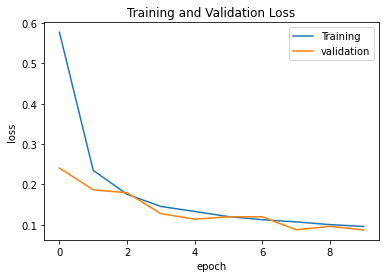

In [12]:
plt.plot(training_hist.history['loss'])
plt.plot(training_hist.history['val_loss'])
plt.title("Training and Validation Loss")
plt.legend(["Training", "validation"], loc="upper right")
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

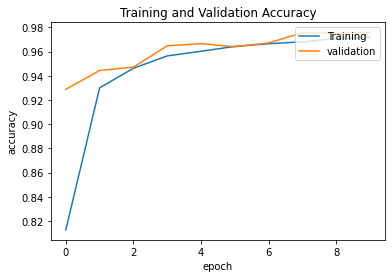

In [13]:
plt.plot(training_hist.history['accuracy'])
plt.plot(training_hist.history['val_accuracy'])
plt.title("Training and Validation Accuracy")
plt.legend(["Training", "validation"], loc="upper right")
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [14]:
loss_accuracy_score = nn_model.evaluate(x_test2, y_test2)
print("Loss : ", loss_accuracy_score[0])
print("Accuracy Score : ", loss_accuracy_score[1])

313/313 [==============================] - 4s 10ms/step - loss: 0.0912 - accuracy: 0.9723
Loss :  0.09115688502788544
Accuracy Score :  0.9722999930381775


In [15]:
nn_model2 = Sequential()
nn_model2.add(LSTM(100, activation='tanh', input_shape=(28, 28)))
nn_model2.add(Dense(10, activation='sigmoid'))
nn_model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               51600     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 52,610
Trainable params: 52,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
training_hist2 = nn_model2.fit(x_train2, y_train2, batch_size=100, epochs=10, verbose=2, validation_data=(x_val2, y_val2))

Epoch 1/10
550/550 - 9s - loss: 0.5271 - accuracy: 0.8277 - val_loss: 0.1775 - val_accuracy: 0.9492 - 9s/epoch - 17ms/step
Epoch 2/10
550/550 - 6s - loss: 0.1572 - accuracy: 0.9529 - val_loss: 0.1108 - val_accuracy: 0.9680 - 6s/epoch - 11ms/step
Epoch 3/10
550/550 - 6s - loss: 0.1094 - accuracy: 0.9669 - val_loss: 0.0906 - val_accuracy: 0.9730 - 6s/epoch - 10ms/step
Epoch 4/10
550/550 - 6s - loss: 0.0845 - accuracy: 0.9742 - val_loss: 0.0703 - val_accuracy: 0.9798 - 6s/epoch - 10ms/step
Epoch 5/10
550/550 - 6s - loss: 0.0682 - accuracy: 0.9789 - val_loss: 0.0777 - val_accuracy: 0.9754 - 6s/epoch - 11ms/step
Epoch 6/10
550/550 - 5s - loss: 0.0557 - accuracy: 0.9827 - val_loss: 0.0557 - val_accuracy: 0.9828 - 5s/epoch - 10ms/step
Epoch 7/10
550/550 - 6s - loss: 0.0468 - accuracy: 0.9855 - val_loss: 0.0588 - val_accuracy: 0.9824 - 6s/epoch - 11ms/step
Epoch 8/10
550/550 - 5s - loss: 0.0435 - accuracy: 0.9865 - val_loss: 0.0577 - val_accuracy: 0.9834 - 5s/epoch - 10ms/step
Epoch 9/10
550/5

Text(0, 0.5, 'loss')

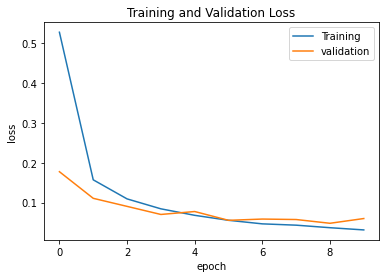

In [17]:
plt.plot(training_hist2.history['loss'])
plt.plot(training_hist2.history['val_loss'])
plt.title("Training and Validation Loss")
plt.legend(["Training", "validation"], loc="upper right")
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

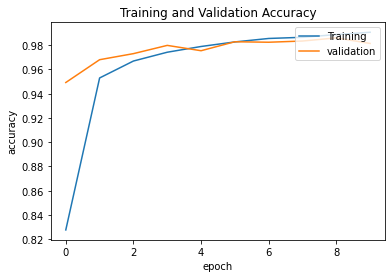

In [18]:
plt.plot(training_hist2.history['accuracy'])
plt.plot(training_hist2.history['val_accuracy'])
plt.title("Training and Validation Accuracy")
plt.legend(["Training", "validation"], loc="upper right")
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [19]:
loss_accuracy_score2 = nn_model2.evaluate(x_test2, y_test2)
print("Loss : ", loss_accuracy_score2[0])
print("Accuracy Score : ", loss_accuracy_score2[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.0678 - accuracy: 0.9800
Loss :  0.0677831768989563
Accuracy Score :  0.9800000190734863
